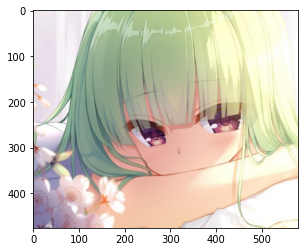

In [21]:
import cv2
import matplotlib.pyplot as plot
import torch
import torch.nn as nn
import numpy as np
import PIL.Image as Image
import torchvision.transforms as transforms

#经典只用plt读取（ndarray），plt显示
img=plot.imread("murasame.jpg")
plot.imshow(img)
plot.show()

#经典cv2读取(ndarray)，matplotlib显示.(cv2不适合展示)
# img = cv2.imread('./murasame.jpg', 1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plot.imshow(img)
# plot.show()

#非经典PIL读取(PIL类型)，matplotlib显示（pil不适合展示）
# img=Image.open("murasame.jpg")
# plot.imshow(img)
# plot.show()

# # cv2->hwc pytorch->chw pil->hwc
# 这一句就等于下一句！！！！！自带转换为CHW和转换为（0，1）
img=transforms.ToTensor()(img)
# img = torch.tensor(img.transpose((2,0,1))/255,dtype=torch.float)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


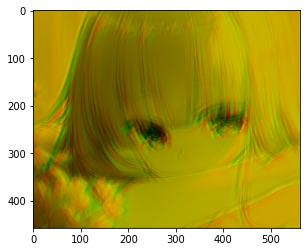

In [22]:
conv=nn.Conv2d(in_channels=3,out_channels=3,kernel_size=5,stride=1,padding=1,dilation=5) #空洞卷积，dilation=1表示没有空洞
output=conv(img.unsqueeze(0))
fuck=output[0].detach().numpy().transpose(1,2,0)
plot.imshow(fuck)
plot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


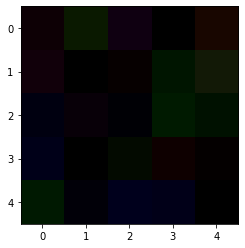

In [15]:
# 卷积核k
par=conv.weight.data
conv1=np.asarray(par[0])
plot.imshow(conv1.transpose(1,2,0))
plot.show()

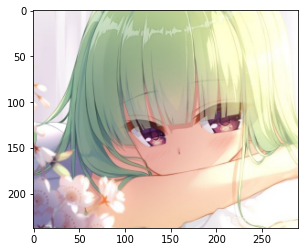

In [52]:
pool=nn.AvgPool2d(kernel_size=2)
output=pool(img.unsqueeze(0))
fuck=output[0].detach().numpy().transpose(1,2,0)
plot.imshow(fuck)
plot.show()

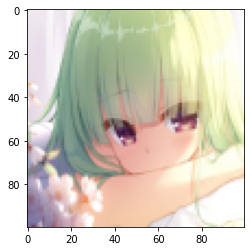

In [54]:
pool=nn.AdaptiveAvgPool2d(output_size=(100,100))
output=pool(img.unsqueeze(0))
fuck=output[0].detach().numpy().transpose(1,2,0)
plot.imshow(fuck)
plot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


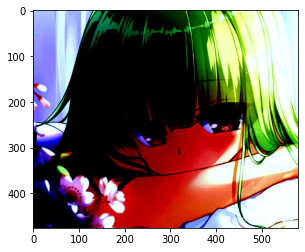

In [38]:
bn=nn.BatchNorm2d(3)
output=bn(img.unsqueeze(0))
fuck=output[0].detach().numpy().transpose(1,2,0)
plot.imshow(fuck)
plot.show()
bnmean =bn.running_mean
bnstd =bn.running_var

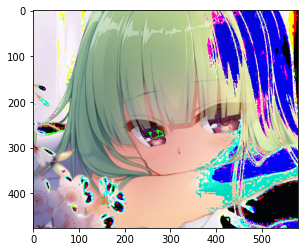

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


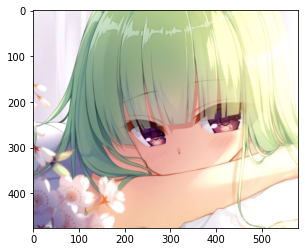

In [43]:
#为啥不一样，bn和nor有区别吗,我查的似乎没区别，算了无所谓
new_img1 = transforms.Normalize(mean=[0.0814,0.0786,0.0708], std=[0.9036,0.9030,0.9028])(img)
plot.imshow(transforms.ToPILImage()(new_img1))
plot.show()

new_img1 = transforms.Normalize(mean=[0.0814,0.0786,0.0708], std=[0.9036,0.9030,0.9028])(img)
plot.imshow(new_img1.numpy().transpose(1,2,0))
plot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


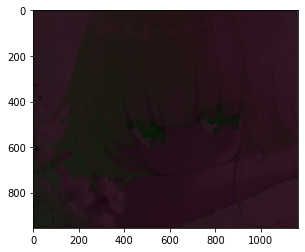

In [16]:
# 上采样
conv=nn.ConvTranspose2d(in_channels=3,out_channels=3,kernel_size=5,stride=2)
output=conv(img.unsqueeze(0))
fuck=output[0].detach().numpy().transpose(1,2,0)
plot.imshow(fuck)
plot.show()

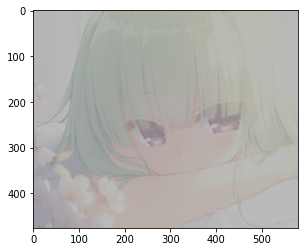

In [20]:
bn=nn.Sigmoid()
output=bn(img.unsqueeze(0))
fuck=output[0].detach().numpy().transpose(1,2,0)
plot.imshow(fuck)
plot.show()